In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape(x_train.shape[0],28*28)
x_test = x_test.reshape(x_test.shape[0],28*28)
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype('float32')/255.0

In [4]:
from sklearn.preprocessing import LabelBinarizer

In [5]:
lb = LabelBinarizer()#categorical to binary

In [6]:
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential()
model.add(Dense(128,input_shape=(784,),activation="sigmoid")) #imp
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
from tensorflow.keras.optimizers import SGD

In [10]:
sgd = SGD(0.01)

In [11]:
model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=["accuracy"])
H = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 2.2843 - accuracy: 0.1549 - val_loss: 2.2499 - val_accuracy: 0.2255
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 2.2237 - accuracy: 0.3349 - val_loss: 2.1911 - val_accuracy: 0.4277
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 2.1560 - accuracy: 0.4605 - val_loss: 2.1101 - val_accuracy: 0.4929
Epoch 4/10
469/469 [==============================] - 4s 10ms/step - loss: 2.0592 - accuracy: 0.5255 - val_loss: 1.9922 - val_accuracy: 0.5446
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 1.9207 - accuracy: 0.5752 - val_loss: 1.8294 - val_accuracy: 0.5799
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 1.7404 - accuracy: 0.6159 - val_loss: 1.6316 - val_accuracy: 0.6474
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 1.5389 - accuracy: 0.6636 - val_loss: 1.4288 - val_accuracy: 0.6989
Epoch

In [12]:
predictions = model.predict(x_test,batch_size=128)

79/79 [==============================] - 0s 4ms/step


In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(y_test.argmax(axis=1),predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       980
           1       0.77      0.99      0.87      1135
           2       0.84      0.74      0.79      1032
           3       0.73      0.84      0.78      1010
           4       0.70      0.72      0.71       982
           5       0.81      0.54      0.65       892
           6       0.83      0.89      0.86       958
           7       0.80      0.87      0.83      1028
           8       0.83      0.59      0.69       974
           9       0.69      0.61      0.65      1009

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000



In [15]:
import matplotlib.pyplot as plt
import numpy as np

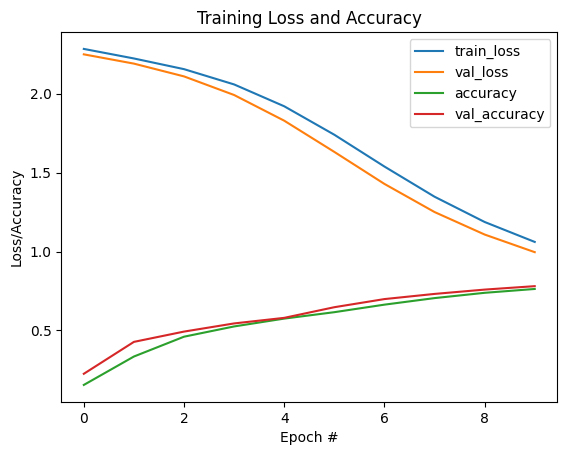

In [16]:
plt.plot(np.arange(0,10),H.history["loss"],label='train_loss')
plt.plot(np.arange(0,10),H.history["val_loss"],label='val_loss')
plt.plot(np.arange(0,10),H.history["accuracy"],label='accuracy')
plt.plot(np.arange(0,10),H.history["val_accuracy"],label='val_accuracy')
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
